# Importing library.

In [1]:
# importing required library

import pandas as pd
import numpy as np

from random import sample
from numpy.random import uniform

from math import isnan
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# K-Mean clustering.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Hierarchical clustering.
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Loading and preprocessing dataset.

In [2]:
# reading dataset.

dataset = pd.read_csv('dataset/Country-data.csv')
dataset.head(10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [3]:
# Converting into absolute value from the percentage.

dataset['exports'] = (dataset['exports']*dataset['gdpp'] /100)
dataset['imports'] = (dataset['imports']*dataset['gdpp'] / 100)
dataset['health'] = (dataset['health']*dataset['gdpp'] / 100)

dataset.head(10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840


# Checking for Missing data.

In [4]:
# checking for any missing data.

dataset.isnull().any()


country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

# Finding Correlation among different features.

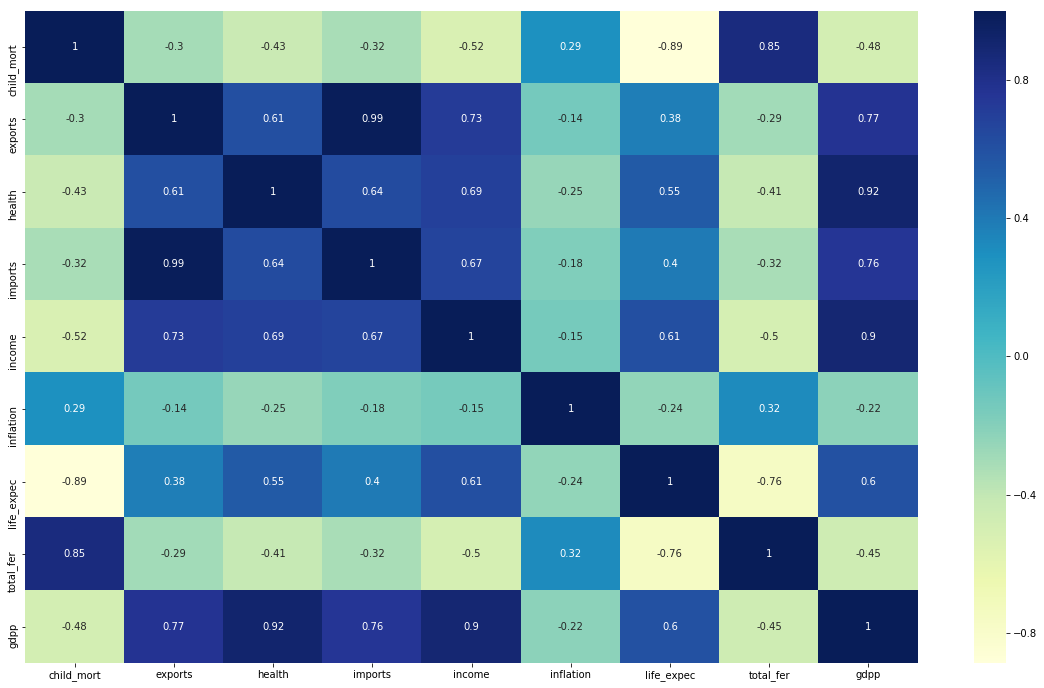

In [5]:
# plotting the and finding the correleation among each element.
# Before that we first drop the the country column.

plt.figure(figsize = (20,12))        
sb.heatmap(dataset.corr(),annot = True, cmap="YlGnBu")


# Implementaing Standardization.

In [6]:
# dropping country column for standardization

dataset_original = dataset.copy()
dataset.drop(['country'], axis=1, inplace=True)

# here we are not implementing normalization instead of that we use  Standardization.

standardScaler = StandardScaler()
dataset_scaled = standardScaler.fit_transform(dataset)

dataset_scaled

c:\users\ankit suman\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\ankit suman\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# Implementing Principal Component Analysis.

In [7]:
pca = PCA(svd_solver='randomized', random_state = 11)
pca.fit(dataset_scaled)

# variance ratio.
# It can be seen that first principal component is responsible for 58.93% variance. 
# Similarly, the second principal component causes 18.4% variance in the dataset. 
# Collectively we can say that (58.93 + 18.4) 77.33% percent of information contained 
# in the feature set is captured by the first two principal components.

pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

# Plotting variance graph.

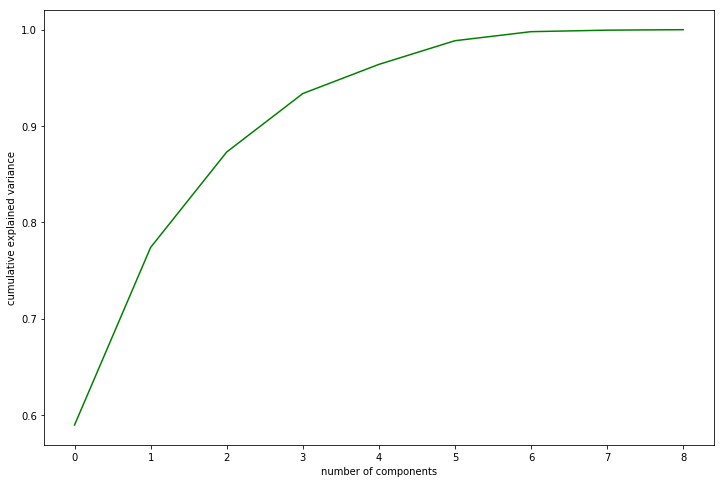

In [8]:
# now plotting the graph to see variance ratio.

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'green')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [9]:
# Here graph shows that taking first 3 components would be good to reach 90% vaiance.

col_names = list(dataset.columns)

pcs_df = pd.DataFrame({ 'Feature':col_names,'PC1':pca.components_[0],
                                            'PC2':pca.components_[1],
                                            'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


In [10]:
# since we have two principal component so, n_components = 3

pca_incremental = IncrementalPCA(n_components = 3)

# dataframe

df_pca_incremental = pca_incremental.fit_transform(dataset_scaled)

# taking transpose to create new matrix.

p_component = np.transpose(df_pca_incremental)
p_component


array([[-2.63744157e+00, -2.22769569e-02, -4.57626261e-01,
        -2.72452030e+00,  6.49848516e-01,  3.71968554e-02,
        -3.32691520e-01,  3.18036154e+00,  3.81568156e+00,
        -4.67515152e-01,  1.49875246e+00,  1.47097104e+00,
        -1.01419903e+00,  8.45238116e-01, -1.34473920e-02,
         3.96087770e+00, -4.02707071e-01, -2.36598657e+00,
        -7.14998191e-01, -1.01778054e+00,  2.52812687e-01,
        -1.13095912e+00,  1.66280202e-01,  2.69525065e+00,
         2.80569006e-01, -2.75387449e+00, -2.76406823e+00,
        -1.17929406e+00, -2.44142939e+00,  3.39411994e+00,
        -5.23229456e-01, -3.24153046e+00, -3.18889212e+00,
         6.92394286e-01, -1.28851026e-01, -1.38822916e-02,
        -1.94991207e+00, -3.11679859e+00, -2.04776384e+00,
         4.31523541e-01, -2.57476033e+00,  8.46278142e-01,
         2.31379384e+00,  1.67463303e+00,  4.37600084e+00,
        -3.67788028e-01, -3.02658561e-01, -8.36646810e-01,
        -3.36572123e-01, -1.05577406e+00, -1.94848965e+0

In [11]:
#Let's create the newer matrix according to the given principal components

rownames = list(dataset_original['country'])

pc_dataframe = pd.DataFrame({'country':rownames,'PC1':p_component[0],
                                                'PC2':p_component[1], 
                                                'PC3':p_component[2]})
pc_dataframe.head(10)


,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103
5,Argentina,0.037197,-0.680889,1.466963
6,Armenia,-0.332692,-1.274517,0.176636
7,Australia,3.180362,-0.250785,-0.116877
8,Austria,3.815682,0.256083,-0.270495
9,Azerbaijan,-0.467515,-0.493492,0.603288


# Outlier Analysis.

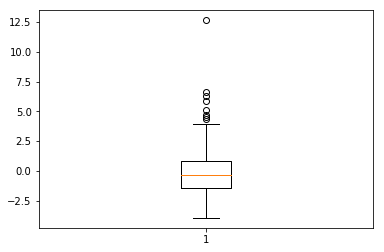

In [12]:
# doing outlier analysis before proceeding to clustering

plt.boxplot(pc_dataframe.PC1 )

Q1 = pc_dataframe.PC1.quantile(0.05)
Q3 = pc_dataframe.PC1.quantile(0.95)

IQR = Q3 - Q1

pc_dataframe = pc_dataframe[(pc_dataframe.PC1 >= Q1) & (pc_dataframe.PC1 <= Q3)]

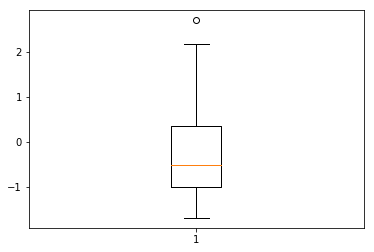

In [13]:
plt.boxplot(pc_dataframe.PC2)

Q1 = pc_dataframe.PC2.quantile(0.05)
Q3 = pc_dataframe.PC2.quantile(0.95)

IQR = Q3 - Q1
pc_dataframe = pc_dataframe[(pc_dataframe.PC2 >= Q1) & (pc_dataframe.PC2 <= Q3)]

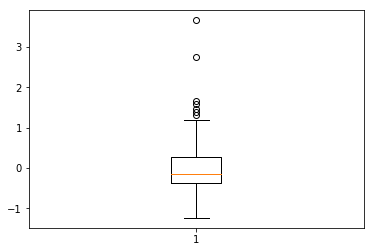

In [14]:
plt.boxplot(pc_dataframe.PC3)

Q1 = pc_dataframe.PC3.quantile(0.05)
Q3 = pc_dataframe.PC3.quantile(0.95)

IQR = Q3 - Q1

pc_dataframe = pc_dataframe[(pc_dataframe.PC3 >= Q1 ) & (pc_dataframe.PC3 <= Q3)]

# Hopkin's Statistics.

In [15]:
# The Hopkins statistic is a way of measuring the cluster tendency of a data set. 
# It belongs to the family of sparse sampling tests. 

def hopkins_stats(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [16]:
# Hopkins measure

hopkins_stats(pc_dataframe.drop(['country'],axis=1))


0.7729355294541245

In [17]:
pc_df_data = pc_dataframe
pc_df_data2 = standardScaler.fit_transform(pc_df_data.drop(['country'],axis=1))

# Identify the ideal number of clusters & implementing K-Means Algorithm.

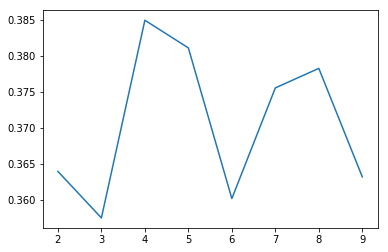

In [18]:
# Let's check the silhouette score first to identify the ideal number of clusters.
# peak decides the number of cluster. 

ss1 = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pc_df_data2)
    ss1.append([k, silhouette_score(pc_df_data2, kmeans.labels_)])

plt.plot(pd.DataFrame(ss1)[0], pd.DataFrame(ss1)[1]);


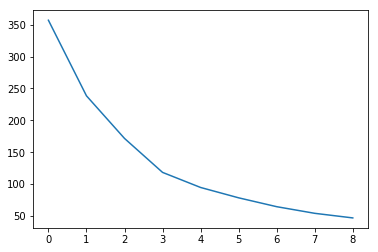

In [19]:
# The peak at around 5 clusters indicating that it might be the ideal number of clusters.
# Let's use the elbow curve method to identify the ideal number of clusters.

ss2 = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pc_df_data2)
    ss2.append(model_clus.inertia_)

plt.plot(ss2)

In [20]:
# From 3-7 clusters we have distinct curve going down.

In [21]:
# Let's finally create the clusters, K-means with k = 5 clusters

model_clus_5 = KMeans(n_clusters = 5, max_iter=50)
model_clus_5.fit(pc_df_data2)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
pc_df_data3 = pc_dataframe

pc_df_data3.index = pd.RangeIndex(len(pc_df_data3.index))
data_km = pd.concat([pc_df_data3, pd.Series(model_clus_5.labels_)], axis=1)
data_km.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']

data_km.head(10)


,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,4
1,Algeria,-0.457626,-0.673301,0.961867,2
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0
3,Armenia,-0.332692,-1.274517,0.176636,2
4,Australia,3.180362,-0.250785,-0.116877,3
5,Austria,3.815682,0.256083,-0.270495,3
6,Azerbaijan,-0.467515,-0.493492,0.603288,2
7,Bahamas,1.498752,-0.428907,-0.550238,3
8,Bahrain,1.470971,-0.326796,0.428412,2
9,Bangladesh,-1.014199,-0.711808,-0.116989,0


In [23]:
# we have total cluster with the number of assignment.

data_km['ClusterID'].value_counts()

0    41
2    27
3    21
4    19
1    11
Name: ClusterID, dtype: int64

# Analyzing Cluster.

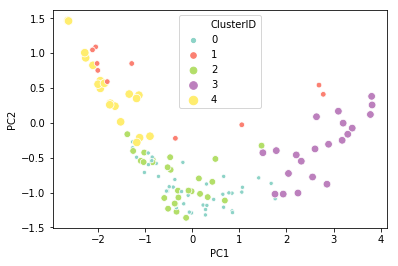

In [24]:
# visualising the clusters on the original principal components

sb.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data = data_km, size="ClusterID",palette="Set3")

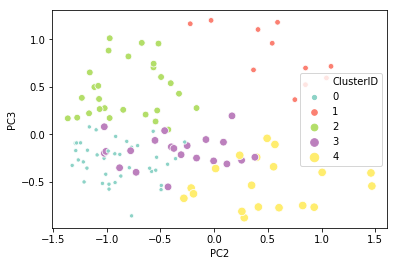

In [25]:
sb.scatterplot(x='PC2',y='PC3',hue='ClusterID',legend='full', data = data_km, size="ClusterID",palette="Set3")

In [26]:
# we noticed that some even though some distinct clusters are being formed, some are not so good.

pc_df_data4 = pd.merge(dataset_original, data_km, on='country')

pc_df_data5 = pc_df_data4[['country','child_mort','exports','imports',
                           'health', 'income', 'inflation', 'life_expec',
                           'total_fer', 'gdpp', 'ClusterID']]

cluster_chi = pd.DataFrame(pc_df_data5.groupby(["ClusterID"]).child_mort.mean())
cluster_exp = pd.DataFrame(pc_df_data5.groupby(["ClusterID"]).exports.mean())
cluster_imp = pd.DataFrame(pc_df_data5.groupby(["ClusterID"]).imports.mean())
cluster_hea = pd.DataFrame(pc_df_data5.groupby(["ClusterID"]).health.mean())
cluster_inc = pd.DataFrame(pc_df_data5.groupby(["ClusterID"]).income.mean())
cluster_inf = pd.DataFrame(pc_df_data5.groupby(["ClusterID"]).inflation.mean())         
cluster_lif = pd.DataFrame(pc_df_data5.groupby(["ClusterID"]).life_expec.mean())
cluster_tot = pd.DataFrame(pc_df_data5.groupby(["ClusterID"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(pc_df_data5.groupby(["ClusterID"]).gdpp.mean())

dataFrame_final = pd.concat([pd.Series([0,1,2,3,4]), cluster_chi, cluster_exp, cluster_imp, cluster_hea, cluster_inc,
                                        cluster_inf, cluster_lif, cluster_tot, cluster_gdpp], axis=1)

dataFrame_final.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health_Spending",
              "Income","Inflation", "Life_Expectancy","Total_Fertility","GDPpcapita"]

dataFrame_final

,ClusterID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,21.148780,3747.861535,4137.778173,526.896683,12722.195122,2.947049,73.192683,2.259756,7544.439024
1,1,47.472727,7308.767273,4668.677273,386.551182,22338.181818,17.400000,68.536364,3.815455,11196.363636
2,2,23.077778,2398.641689,2158.479481,333.941607,12227.037037,11.194074,72.818519,2.257778,5599.259259
3,3,4.828571,13899.352381,13822.761905,3757.613810,35666.666667,1.365952,80.500000,1.745714,37319.047619
4,4,65.084211,787.408095,969.381895,145.439137,3983.157895,6.446842,61.657895,4.266842,2025.947368


In [27]:
# We observe that following are good imformation for development of a country :
# 1) Child mortality, 
# 2) Export, 
# 3) Import 4
# 4) Inflation 
# 5) GDP per capita are good predictors for the development of a country.


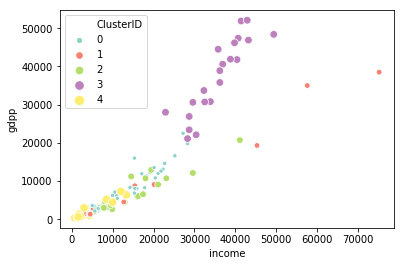

In [28]:
sb.scatterplot(x='income',y='gdpp', hue='ClusterID', legend='full', data = pc_df_data5, size="ClusterID",palette="Set3")

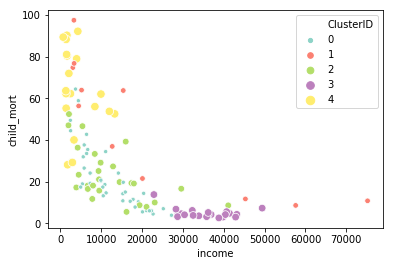

In [29]:
sb.scatterplot(x='income',y='child_mort', hue='ClusterID', legend='full', data = pc_df_data5, size="ClusterID",palette="Set3")

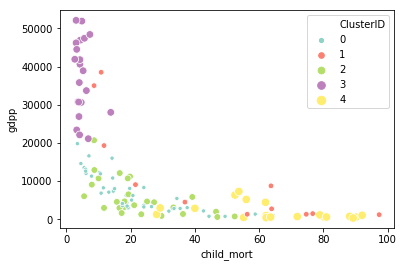

In [30]:
sb.scatterplot(x='child_mort',y='gdpp',data = pc_df_data5, legend='full', hue='ClusterID',size="ClusterID",palette="Set3")

# Cluster for Countries that seek attention.

In [31]:
# From the graph we can assume that.
# Countries that seek attention are in cluster 4.

pc_df_data5[pc_df_data5['ClusterID'] == 4]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,4
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,4
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,4
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,4
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,4
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,4
62,Lao,78.9,403.5600,562.020,50.9580,3980,9.20,63.8,3.15,1140,4
64,Liberia,89.3,62.4570,302.802,38.5860,700,5.47,60.8,5.02,327,4
67,Madagascar,62.2,103.2500,177.590,15.5701,1390,8.79,60.8,4.60,413,4
73,"Micronesia, Fed. Sts.",40.0,672.1000,2316.600,406.1200,3340,3.80,65.4,3.46,2860,4


In [56]:
# most developed countries are in the cluster 3.

pc_df_data5[pc_df_data5['ClusterID'] == 3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
4,Australia,4.8,10276.2,10847.1,4530.87,41400,1.160,82.0,1.93,51900,3
5,Austria,4.3,24059.7,22418.2,5159.00,43200,0.873,80.5,1.44,46900,3
7,Bahamas,13.8,9800.0,12236.0,2209.20,22900,-0.393,73.8,1.86,28000,3
19,Canada,5.6,13793.4,14694.0,5356.20,40700,2.870,81.3,1.63,47400,3
27,Cyprus,3.6,15461.6,17710.0,1838.76,33900,2.010,79.9,1.42,30800,3
36,Finland,3.0,17879.4,17278.8,4134.90,39800,0.351,80.0,1.87,46200,3
37,France,4.2,10880.8,11408.6,4831.40,36900,1.050,81.4,2.03,40600,3
41,Germany,4.2,17681.4,15507.8,4848.80,40400,0.758,80.1,1.39,41800,3
43,Greece,3.9,5944.9,8258.3,2770.70,28700,0.673,80.4,1.48,26900,3
48,Iceland,2.6,22374.6,18142.7,3938.60,38800,5.470,82.0,2.20,41900,3


# Hierarchical Clustering.

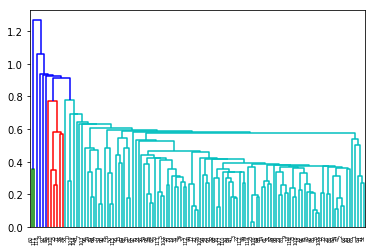

In [33]:
# doing single linkage.

merging = linkage(pc_df_data2, method = "single", metric='euclidean')
dendrogram(merging)

plt.show()

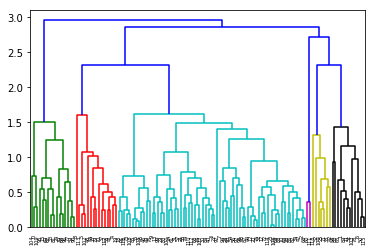

In [34]:
# doing average linkage.

merging = linkage(pc_df_data2, method ="average", metric='euclidean')
dendrogram(merging)

plt.show()

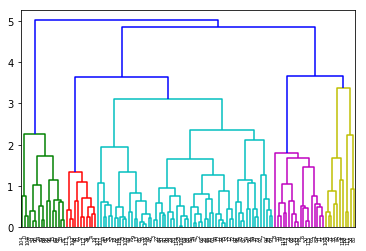

In [35]:
# doing complete linkage.

merging = linkage(pc_df_data2, method = "complete", metric='euclidean')
dendrogram(merging)

plt.show()

In [36]:
# so, we get good cluster for complete linkage.

In [37]:
# eliminate the barriers.

cluster_cut = pd.Series(cut_tree(merging, n_clusters = 5).reshape(-1,))

data_h_cluster = pd.concat([pc_df_data, cluster_cut], axis=1)
data_h_cluster.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']

data_h_cluster.head(10)

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,2
4,Australia,3.180362,-0.250785,-0.116877,3
5,Austria,3.815682,0.256083,-0.270495,3
6,Azerbaijan,-0.467515,-0.493492,0.603288,1
7,Bahamas,1.498752,-0.428907,-0.550238,2
8,Bahrain,1.470971,-0.326796,0.428412,1
9,Bangladesh,-1.014199,-0.711808,-0.116989,2


In [38]:

data_h_cluster_2 = pd.merge(dataset_original, data_h_cluster, on='country')
data_h_cluster_3 = data_h_cluster_2[['country','child_mort','exports','imports','health','income',
                                     'inflation','life_expec','total_fer','gdpp','ClusterID']]

data_h_cluster_3.head(10)

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.440,56.2,5.82,553,0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.100,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.440,76.8,2.13,12200,2
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.770,73.3,1.69,3220,2
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.160,82.0,1.93,51900,3
5,Austria,4.3,24059.70,22418.200,5159.0000,43200,0.873,80.5,1.44,46900,3
6,Azerbaijan,39.2,3171.12,1208.880,343.3920,16000,13.800,69.1,1.92,5840,1
7,Bahamas,13.8,9800.00,12236.000,2209.2000,22900,-0.393,73.8,1.86,28000,2
8,Bahrain,8.6,14386.50,10536.300,1028.7900,41100,7.440,76.0,2.16,20700,1
9,Bangladesh,49.4,121.28,165.244,26.6816,2440,7.140,70.4,2.33,758,2


In [39]:
data_h_cluster_3['ClusterID'].value_counts()

2    63
1    18
0    16
4    11
3    11
Name: ClusterID, dtype: int64

In [40]:
data_h_cluster_3[data_h_cluster_3['ClusterID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,0
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,0
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,0
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,0
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,0
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,0
62,Lao,78.9,403.5600,562.020,50.9580,3980,9.20,63.8,3.15,1140,0
64,Liberia,89.3,62.4570,302.802,38.5860,700,5.47,60.8,5.02,327,0
67,Madagascar,62.2,103.2500,177.590,15.5701,1390,8.79,60.8,4.60,413,0
77,Namibia,56.0,2480.8200,3150.330,351.8820,8460,3.56,58.6,3.60,5190,0


In [41]:
data_h_cluster_3[data_h_cluster_3['ClusterID']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Algeria,27.3,1712.6400,1400.440,185.982,12900,16.10,76.5,2.89,4460,1
6,Azerbaijan,39.2,3171.1200,1208.880,343.392,16000,13.80,69.1,1.92,5840,1
8,Bahrain,8.6,14386.5000,10536.300,1028.790,41100,7.44,76.0,2.16,20700,1
11,Belarus,5.5,3099.4200,3889.350,338.283,16200,15.10,70.4,1.49,6030,1
16,Brazil,19.8,1198.4000,1321.600,1009.120,14500,8.41,74.2,1.80,11200,1
21,Chile,8.7,4863.3000,4037.700,1026.840,19400,8.96,79.1,1.88,12900,1
50,Indonesia,33.3,755.7300,696.640,81.171,8430,15.30,69.9,2.48,3110,1
51,Iran,19.3,1593.3200,1266.820,365.680,17400,15.90,74.5,1.76,6530,1
55,Jamaica,18.1,1464.8400,2321.280,225.108,8000,9.81,74.7,2.17,4680,1
65,Libya,16.6,7937.6000,5094.100,469.480,29600,14.20,76.1,2.41,12100,1


In [42]:
data_h_cluster_3[data_h_cluster_3['ClusterID']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
4,Australia,4.8,10276.2,10847.1,4530.87,41400,1.160,82.0,1.93,51900,3
5,Austria,4.3,24059.7,22418.2,5159.00,43200,0.873,80.5,1.44,46900,3
19,Canada,5.6,13793.4,14694.0,5356.20,40700,2.870,81.3,1.63,47400,3
36,Finland,3.0,17879.4,17278.8,4134.90,39800,0.351,80.0,1.87,46200,3
37,France,4.2,10880.8,11408.6,4831.40,36900,1.050,81.4,2.03,40600,3
41,Germany,4.2,17681.4,15507.8,4848.80,40400,0.758,80.1,1.39,41800,3
48,Iceland,2.6,22374.6,18142.7,3938.60,38800,5.470,82.0,2.20,41900,3
70,Malta,6.8,32283.0,32494.0,1825.15,28300,3.830,80.3,1.36,21100,3
102,Sweden,3.0,24070.2,21204.7,5017.23,42900,0.991,81.5,1.98,52100,3
112,United Kingdom,5.2,10969.8,11981.2,3749.96,36200,1.570,80.3,1.92,38900,3


In [43]:
data_h_cluster_3[data_h_cluster_3['ClusterID']==4]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,"Congo, Rep.",63.9,2331.74,1498.78,67.404,5190,20.7,60.4,4.95,2740,4
38,Gabon,63.7,5048.75,1653.75,306.250,15400,16.6,62.9,4.08,8750,4
42,Ghana,74.7,386.45,601.29,68.382,3060,16.6,62.2,4.27,1310,4
52,Iraq,36.9,1773.00,1534.50,378.450,12700,16.6,67.2,4.56,4500,4
58,Kazakhstan,21.5,4008.94,2711.93,389.103,20100,19.5,68.4,2.60,9070,4
60,Kuwait,10.8,25679.50,11704.00,1012.550,75200,11.2,78.2,2.21,38500,4
71,Mauritania,97.4,608.40,734.40,52.920,3320,18.9,68.2,4.98,1200,4
80,Oman,11.7,12680.10,7951.60,534.610,45300,15.6,76.1,2.90,19300,4
100,Sudan,76.7,291.56,254.56,93.536,3370,19.6,66.3,4.88,1480,4
111,United Arab Emirates,8.6,27195.00,22260.00,1281.000,57600,12.5,76.5,1.87,35000,4


# Analyzing each cluster.

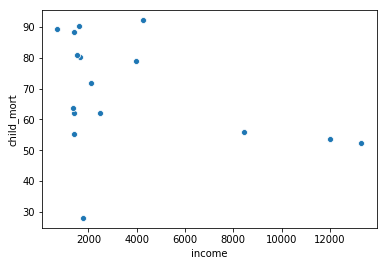

In [44]:
data_ana = data_h_cluster_3[data_h_cluster_3['ClusterID']==0]
sb.scatterplot(x='income',y='child_mort',data = data_ana)

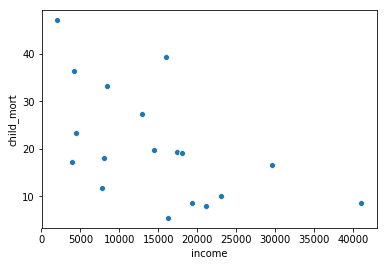

In [45]:
data_ana = data_h_cluster_3[data_h_cluster_3['ClusterID']==1]
sb.scatterplot(x='income',y='child_mort',data = data_ana) 

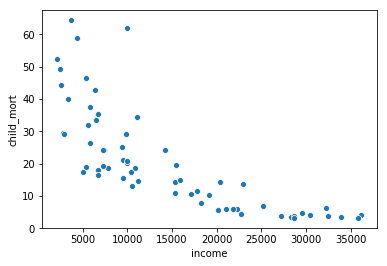

In [46]:
data_ana = data_h_cluster_3[data_h_cluster_3['ClusterID']==2]
sb.scatterplot(x='income',y='child_mort',data = data_ana)

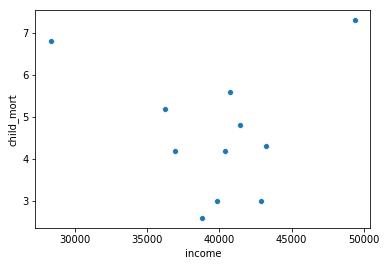

In [47]:
data_ana = data_h_cluster_3[data_h_cluster_3['ClusterID']==3]
sb.scatterplot(x='income',y='child_mort',data = data_ana)

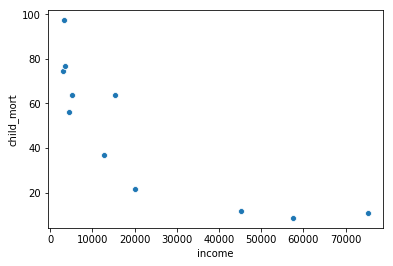

In [48]:
data_ana = data_h_cluster_3[data_h_cluster_3['ClusterID']==4]
sb.scatterplot(x='income',y='child_mort',data = data_ana)

# Finalizing.

In [57]:
# from both the clustering method:

# 1) k-means algorithm : cluster 2

pc_df_data5[pc_df_data5['ClusterID'] == 4].describe()


,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,65.084211,787.408095,969.381895,145.439137,3983.157895,6.446842,61.657895,4.266842,2025.947368,4.0
std,19.698879,1078.314515,1065.956822,190.944353,3897.948253,3.272644,3.800777,1.064545,2196.630386,0.0
min,28.100000,23.087800,112.306000,12.821200,700.000000,2.090000,54.300000,2.590000,327.000000,4.0
25%,54.450000,102.497500,203.021000,36.633950,1480.000000,3.680000,58.950000,3.480000,562.500000,4.0
50%,62.200000,140.400000,324.912000,50.958000,2090.000000,6.350000,61.700000,4.370000,967.000000,4.0
75%,80.650000,1028.060000,1770.495000,133.462500,4130.000000,9.225000,64.950000,4.885000,2915.000000,4.0
max,92.100000,3387.720000,3257.550000,650.832000,13300.000000,11.600000,67.900000,6.150000,7280.000000,4.0


In [59]:
# 2) H-clustering : cluster 0      {insights not so clear.}

data_h_cluster_3[data_h_cluster_3['ClusterID']==0].describe()


,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0
mean,69.087500,594.807112,785.041625,130.643663,3715.625000,7.110000,60.950000,4.455000,1763.937500,0.0
std,17.892266,938.272652,1055.973117,197.234617,3961.328008,3.130316,3.626201,1.049717,2285.321494,0.0
min,28.100000,23.087800,112.306000,12.821200,700.000000,2.090000,54.300000,2.590000,327.000000,0.0
25%,55.800000,93.198750,195.717500,34.005875,1417.500000,4.192500,58.225000,3.787500,559.750000,0.0
50%,67.750000,132.515000,275.549500,44.061350,1720.000000,7.800000,61.250000,4.555000,735.500000,0.0
75%,82.800000,461.662500,683.385000,71.910000,4055.000000,9.297500,64.000000,5.122500,1177.500000,0.0
max,92.100000,2768.600000,3257.550000,650.832000,13300.000000,11.600000,65.900000,6.150000,7280.000000,0.0


In [ ]:
# one thing we noticed that in both of the cluster GDP matters alot 
# mean gdp k-means : 0-2000
# mean gdp h-clus : 0- 1700  
# so, considering gdp as 0 - 1800 , since most of the countries gdp lies under this range.

# filering out.

In [60]:
dataset_original_final = dataset_original.copy()
dataset_original_final = dataset_original_final[dataset_original_final['gdpp']<=1800]

dataset_original_final.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.140,70.4,2.33,758
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
27,Cambodia,44.4,425.2260,44.6448,467.670,2520,3.120,66.1,2.88,786
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769


In [61]:
# total number of countires.

print("Total countries :", len(dataset_original_final))

Total countries : 48


In [63]:
# Here we have 48 countries that falls under 1800 gdp.
# we need to do further filtering.

dataset_original_final.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,84.808333,242.988282,53.166544,389.688794,2209.229167,8.849687,60.789583,4.552500,847.583333
std,37.864382,208.411190,36.338142,306.718665,1134.428833,5.849055,7.282776,1.382764,384.444824
min,17.200000,1.076920,12.821200,0.651092,609.000000,0.885000,32.100000,1.270000,231.000000
25%,61.350000,101.630250,31.079500,175.909500,1390.000000,4.080000,57.175000,3.465000,551.500000
50%,82.050000,150.912000,44.388600,280.956000,1900.000000,8.215000,61.250000,4.875000,758.000000
75%,108.250000,388.087500,60.501250,450.765000,2857.500000,12.150000,66.125000,5.370000,1205.000000
max,208.000000,943.200000,190.710000,1279.550000,4490.000000,23.600000,73.100000,7.490000,1630.000000


In [76]:
# Now we look through mean for "child_mort"

dataset_original_final2 = dataset_original_final[dataset_original_final['child_mort']>=80]

print(len(dataset_original_final2))

dataset_original_final2.describe()


26


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,111.103846,195.666469,43.262027,312.221962,1696.653846,7.987885,56.730769,5.380385,697.115385
std,29.415880,173.238359,23.810721,228.737127,913.615891,5.758981,7.129531,0.951880,340.722447
min,80.300000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000
25%,90.350000,86.448750,30.455575,170.367000,1070.000000,3.940000,55.150000,5.027500,449.250000
50%,104.500000,132.870500,37.959000,248.402500,1465.000000,5.930000,57.400000,5.325000,585.000000
75%,116.000000,196.302000,50.825500,381.071250,1915.000000,11.800000,59.325000,5.857500,865.000000
max,208.000000,617.320000,129.870000,1181.700000,4280.000000,20.800000,68.200000,7.490000,1460.000000


In [74]:
# Now we look through mean for "income"

dataset_original_final3 = dataset_original_final2[dataset_original_final2['income']< 1700]

print(len(dataset_original_final3))

dataset_original_final3.describe()

15


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,115.873333,101.452213,33.915193,222.399200,1112.200000,8.392667,55.286667,5.441333,480.333333
std,33.572554,50.475263,10.497560,98.714238,318.513108,6.083072,7.543291,0.931495,146.337021
min,88.200000,20.605200,17.750800,90.552000,609.000000,1.180000,32.100000,3.330000,231.000000
25%,90.400000,64.744500,26.607700,162.927500,851.000000,3.420000,54.750000,5.035000,373.500000
50%,109.000000,101.286000,34.681900,192.544000,1190.000000,6.810000,57.500000,5.310000,459.000000
75%,119.500000,129.435000,40.336200,279.780000,1400.000000,12.200000,58.350000,5.845000,564.000000
max,208.000000,196.344000,52.269000,428.314000,1610.000000,20.800000,65.900000,7.490000,769.000000


# Final list

In [75]:
dataset_original_final3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.44,56.2,5.82,553
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.87,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547
66,Haiti,208.0,101.2860,45.7442,428.314,1500,5.45,32.1,3.33,662
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
